# 540.432 PK: Week 6 (Metabolism)
Team Members: *Alejandro Soto Franco, Callie Jones, Daniel Labbe, and Samuel Bernstein*

This week, we are tasked with demonstrating models of metabolism and the effects of different types of metabolic processes.

Consider a two-compartment model with a central compartment (denoted by $C$) and a peripheral compartment (denoted by $P$). Let $C_C$ be the concentration of drug in the central compartment, $C_P$ the concentration of drug in the peripheral compartment, and $C_M$ the concentration of metabolite. The rates of change of drug concentration in these compartments are governed by the following differential equations:

- $\frac{dC_C}{dt} = -k_{10}C_C - k_{12}C_C + k_{21}C_P - k_{met}C_C + \frac{R_{a}}{V_C}$,
- $\frac{dC_P}{dt} = k_{12}C_C - k_{21}C_P$,
- $\frac{dC_M}{dt} = \frac{k_{met}C_C}{V_C} - k_{elim}C_M$.

Here:

- $R_{a}$ is the rate of absorption (mass/time) into the central compartment (zero for intravenous administration).
- $V_C$ and $V_P$ are the volumes of the central and peripheral compartments.
- $V_M$ is the volume of distribution for the metabolite.
- $k_{10}$ is the first-order elimination rate constant from the central compartment.
- $k_{12}$ and $k_{21}$ are the rate constants for distribution between the central and peripheral compartments.
- $k_{met}$ is the first-order rate constant for metabolism of the drug in the central compartment.
- $k_{elim}$ is the first-order elimination rate constant for the metabolite.
- $\frac{R_{a}}{V_C}$ represents the absorption rate divided by the volume.
- $\frac{k_{met}C_C}{V_C}$ represents the rate of drug metabolism divided by the volume of the central compartment.

Metabolism typically involves Phase I (biochemical modification) and Phase II (conjugation) reactions. In this model, $k_{met}$ represents the overall metabolism rate constant, combining both phases.$k_{met}C_C$ represents the rate of drug metabolism, and $k_{elim}C_M$ represents the rate of metabolite elimination. We assume that metabolism directly translates the parent compound into a single metabolite type and that the metabolite is eliminated from the body without further metabolism.

## 6A: Model Diagram

Below, we have provided a simple sketch of the model.

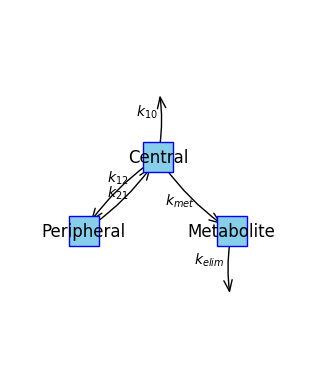

In [ ]:
## ASFPKD 6A: Plotting the two-compartment model

import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches

# Create the directed graph
G = nx.DiGraph()
G.add_nodes_from(['Central', 'Peripheral', 'Metabolite'])
G.add_nodes_from(['Elim_Central', 'Elim_Metabolite'])

# Define edges
G.add_edge('Central', 'Peripheral', label='$k_{12}$')
G.add_edge('Peripheral', 'Central', label='$k_{21}$')
G.add_edge('Central', 'Metabolite', label='$k_{met}$')
G.add_edge('Central', 'Elim_Central', label='$k_{10}$')
G.add_edge('Metabolite', 'Elim_Metabolite', label='$k_{elim}$')

# Position the nodes manually
pos = {
    'Central': (1, 1.5),
    'Peripheral': (0.5, 1),
    'Metabolite': (1.5, 1),
    'Elim_Central': (1, 2),
    'Elim_Metabolite': (1.5, 0.5)
}

# Create a figure and axes
fig, ax = plt.subplots()

# Draw the edges
nx.draw_networkx_edges(G, pos, ax=ax, connectionstyle='arc3,rad=0.1', arrows=True, arrowstyle='->,head_width=0.3,head_length=0.8')

# Draw the nodes
for node, (x, y) in pos.items():
    if node in ['Central', 'Peripheral', 'Metabolite']:  # Only draw the main nodes
        rect = patches.Rectangle((x-0.1, y-0.1), 0.2, 0.2, linewidth=1, edgecolor='blue', facecolor='skyblue')
        ax.add_patch(rect)
        plt.text(x, y, node, ha='center', va='center', fontsize=12, color='black')

# Draw edge labels with transparent background and no border
edge_labels = nx.get_edge_attributes(G, 'label')
transparent_bbox = dict(boxstyle="round,pad=0.3", ec=(1., 1., 1., 0.), fc=(1., 1., 1., 0.),)  # transparent bounding box with no edge color

# Tuning label offsets
offsets = {
    '$k_{12}$': (0.05, 0.05),
    '$k_{21}$': (0.05, -0.05),
    '$k_{met}$': (0, -0.1),
    '$k_{elim}$': (-0.05, 0)
}

for (node1, node2), label in edge_labels.items():
    position = pos[node1][0] / 2 + pos[node2][0] / 2, pos[node1][1] / 2 + pos[node2][1] / 2
    if label in offsets:
        offset_x, offset_y = offsets[label]
        position = (position[0] + offset_x, position[1] + offset_y)

    plt.text(position[0], position[1], label, bbox=transparent_bbox, fontsize=10, ha='right', va='bottom')

plt.xlim(0, 2)
plt.ylim(0, 2.5)
ax.set_aspect('equal')
plt.axis('off')
plt.show()


## 6B: Modeling metabolism of a hypothetical drug
We'll use the scipy.integrate.solve_ivp function to solve the system of ordinary differential equations (ODEs). The model parameters are arbitrary.

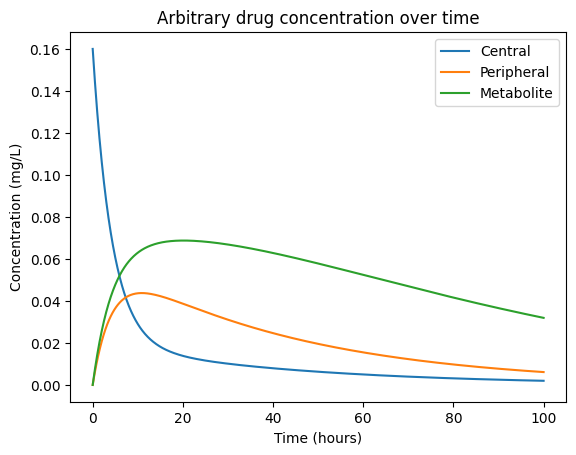

In [ ]:
## ASFPKD 6B: Modeling metabolism of a hypothetical drug

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

k12 = 0.1  # Rate of transfer from Central to Peripheral
k21 = 0.05  # Rate of transfer from Peripheral to Central
kmet = 0.08  # Rate of metabolism
k10 = 0.03  # Rate of elimination from Central
kelim = 0.02  # Rate of elimination from Metabolite
V1 = 25.0  # Volume of distribution of the Central compartment
V2 = 30.0  # Volume of distribution of the Peripheral compartment
V3 = 20.0  # Volume of distribution of the Metabolite compartment
Dose = 100.0  # Total drug dose

# Define the system of ODEs
def model(t, y):
    Q1, Q2, Q3 = y
    dQ1dt = -k10 * Q1 - k12 * Q1 + k21 * Q2 - kmet * Q1
    dQ2dt = k12 * Q1 - k21 * Q2
    dQ3dt = kmet * Q1 - kelim * Q3
    return [dQ1dt, dQ2dt, dQ3dt]

# Initial conditions: Drug is administered into the Central compartment
y0 = [Dose/V1, 0, 0]

# Time interval (in hours, for instance)
t = np.linspace(0, 100, 1000)

# Solve the ODE
sol = solve_ivp(model, [t[0], t[-1]], y0, t_eval=t)

# Convert amounts to concentrations by dividing by the respective volume of distribution
C1 = sol.y[0] / V1
C2 = sol.y[1] / V2
C3 = sol.y[2] / V3

# Plot the results
plt.figure()
plt.plot(sol.t, C1, label='Central')
plt.plot(sol.t, C2, label='Peripheral')
plt.plot(sol.t, C3, label='Metabolite')
plt.title('Arbitrary drug concentration over time')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.legend()
plt.show()


## 6C: Modeling acetylsalicylic acid metabolism
The "metabolite compartment" in a pharmacokinetic model refers to a theoretical space where the drug is metabolized into its metabolites. This doesn't necessarily represent a physical location within the body but rather a conceptual area used in the model to account for the process of metabolism. In the context of acetylsalicylic acid (aspirin), it's metabolized primarily in the liver to salicylic acid, which has significant pharmacological activity. Suppose we orally administer a 300mg dose of acetylsalicylic acid, which has a bioavailability of around 50% according to Rocca and Petrucci (2012). We have a central compartment of the GI tract, which has a baseline volume of 35mL according to Deanna et al. (2014) and peripheral compartment of circulating blood, which is about 5 liters. our metabolite compartment is based on the human liver, which, according to Yang et al. (2021), is approximately 1180.5mL in adults. In lieu of literature values, we will use arbitrary rate constants to approximate the half-life of 3.15 hours at this dosage.

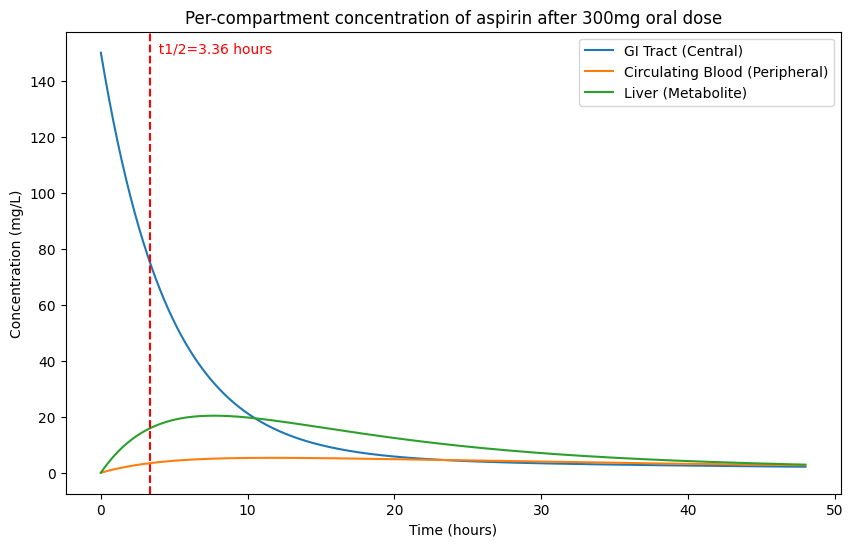

In [ ]:
## ASFPKD 6C: Modeling acetylsalicylic acid metabolism

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the parameters
F = 0.5  # bioavailability
Dose = 300.0 * F  # Total drug dose adjusted for bioavailability, in mg
V1 = 1.0  # Volume of the GI tract in L
V2 = 5.0  # Volume of circulating blood in L
V3 = 1.18  # Volume of the liver in L

# Assume some hypothetical values for the rate constants
k10 = 0.1  # elimination rate from the central compartment
k12 = 0.05  # transfer rate from central to peripheral
k21 = 0.03  # transfer rate from peripheral to central
kmet = 0.06  # metabolism rate
kelim = 0.08  # elimination rate from the metabolite compartment

# Define the system of ODEs
def model(t, y):
    Q1, Q2, Q3 = y
    dQ1dt = -k10 * Q1 - k12 * Q1 + k21 * Q2 - kmet * Q1
    dQ2dt = k12 * Q1 - k21 * Q2
    dQ3dt = kmet * Q1 - kelim * Q3
    return [dQ1dt, dQ2dt, dQ3dt]

# Initial conditions: Drug is administered into the Central compartment
y0 = [Dose/V1, 0, 0]

# Time interval (for instance, in hours)
t = np.linspace(0, 48, 1000)  # simulate for 48 hours

# Solve the ODE
sol = solve_ivp(model, [t[0], t[-1]], y0, t_eval=t)

# Convert amounts to concentrations by dividing by the respective volume of distribution
C1 = sol.y[0] / V1
C2 = sol.y[1] / V2
C3 = sol.y[2] / V3

# Calculate the half-life in the central compartment
half_concentration = C1[0] / 2
half_life_index = np.where(C1 <= half_concentration)[0][0]  # index at which concentration is half
half_life_time = sol.t[half_life_index]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, C1, label='GI Tract (Central)')
plt.plot(sol.t, C2, label='Circulating Blood (Peripheral)')
plt.plot(sol.t, C3, label='Liver (Metabolite)')

# Draw a vertical line at the half-life time and label it
plt.axvline(x=half_life_time, color='r', linestyle='--')
plt.text(half_life_time, C1[0], f'  t1/2={half_life_time:.2f} hours', color='r')

plt.title('Per-compartment concentration of aspirin after 300mg oral dose')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.legend()
plt.show()